In [1]:
from IPython import display

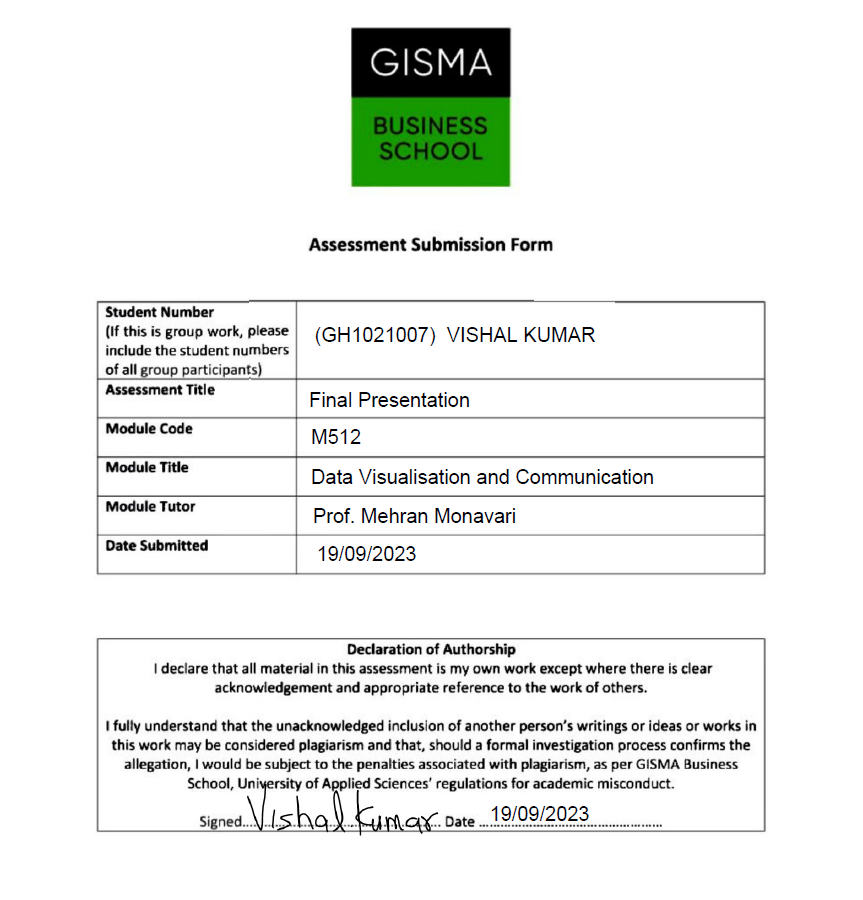

In [2]:
display.Image("/content/M512_Data_Visualisation_and_Communication.png")

#Introduction:

This analysis provides a top-to-bottom look at the characteristics of different songs by different artists over the years. As an experienced data scientist, my objective is to assist record labels, artists, and music enthusiasts in deriving meaningful insights from the given dataset, which contains significant metrics about different tracks.

# Problem Statement:

The cutting-edge music industry is portrayed by quickly changing audience inclinations, innovative progressions, and a gigantic measure of data. To remain important, partners need to grasp the examples, patterns, and attributes that characterize fruitful songs. Utilizing the given dataset, the objective is to comprehend and decipher the information connected with melodies' credits, similar to danceability, energy, loudness, and others, and perceive how they've developed throughout the long term.

# Overview of the Solution:

- The dataset will be loaded and completely assessed for missing values and potential anomalies.
- Descriptive statistics will give an initial comprehension of the data.
- Visualizations will be leveraged to explore various connections and patterns in the dataset.

# Dataset Description:
The dataset contains the following columns:

1. **Artist**: The name of the artist.
2. **Song**: The name of the song.
3. **Duration_ms**: The duration of the song in milliseconds.
4. **Explicit**: Whether the song has explicit content (True/False).
5. **Year**: The year the song was released.
6. **Popularity**: A metric indicating the popularity of the song.
7. **Danceability**: How suitable a song is for dancing.
8. **Energy**: A measure of intensity and activity.
9. **Key**: The primary key of the song.
10. **Loudness**: Overall loudness of the track.
11. **Mode**: Modality of the song.
12. **Speechiness**: Presence of spoken words in the song.
13. **Acousticness**: A confidence measure of whether the track is acoustic.
14. **Instrumentalness**: Predicts if a track doesn't contain vocals.
15. **Liveness**: Detects the presence of an audience in the recording.
16. **Valence**: Describes the musical positiveness of the track.
17. **Tempo**: The speed or pace of the song.
18. **Genre**: The genre of the song.

# Insights and Visualizations:

1. **Trends over the Years**:
   - Line graphs can show how normal values for attributes like danceability, energy, and loudness have evolved.
   - Pie graphs or bar graphs can depict genre distributions over different decades.

2. **Characteristics by Genre**:
   - Box plots can show distributions of characteristics like tempo and energy across various genres.
   
3. **Correlations between Attributes**:
   - A heatmap can visualize correlations between various song attributes.
   
4. **Popularity Metrics**:
   - Scatter plots might exhibit the relationship between popularity and attributes like danceability or energy.
   
# Benefits and Consequences:

**Benefits**:
- **Industry Insight**: By understanding song qualities, record labels can make informed decisions when creating and promoting music.
- **Artist Development**: Artists can comprehend how their music looks at general industry trends and adapt accordingly.

**Consequences**:
- **Oversimplification**: By depending too heavily on metrics, the intrinsic value and creativity in music might be overlooked.
- **Data Accuracy**: Incorrect data or bias in data collection could lead to flawed insights.

# Strengths & Limitations:

**Strengths**:
- **Comprehensive Metrics**: The dataset contains a wide scope of metrics to analyze songs.
- **Historical Perspective**: With data spanning various years, we can understand the evolution of song characteristics over the long run.

**Limitations**:
- **Data Completeness**: The dataset might not represent all songs released in those years or cover all genres.
- **Subjectivity**: Metrics like danceability and valence can be somewhat subjective.


In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode
import seaborn as sns

import datetime as dt
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns',None)
init_notebook_mode(connected=True)

# Code Interpretation
These are the necessary libraries utilized in pipeline.
**pandas** is used for data frame manipulation. **numpy** is utilized for numerical operations. **Matplotlib. pyplot**  and **seaborn** give functions and interfaces for creating various static and informative statistical visualizations, respectively.**plotly.express and plotly.graph_objects** offer high-level and object-oriented approaches for crafting interactive visualizations.**make_subplots** is a capability for making figures with multiple subplots in **Plotly. init_notebook_mode** ensures Plotly visualizations render directly within Jupyter notebooks.**datetime** is utilized for date and time operations.**warnings** is imported to smother any undesirable warnings in the notebook.

In [4]:
spotify_df=pd.read_csv('/content/spotify_dataset.csv', encoding = 'UTF-8')

#Code Interpretation
**spotify_df** is the variable name where the genuine data is put away. It has been encoded with **UTF-8** to isolate the data points from the comma sep. file.
Additionally, **UTF-8** helps in keeping the extraordinary characters properly formatted and maintain
the readability of the data.

In [5]:
spotify_df.head()

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop


In [6]:
spotify_df.tail(10)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1990,Sam Smith,How Do You Sleep?,202204,False,2019,73,0.477,0.682,1,-4.931,0,0.0925,0.1530,0.000000,0.0763,0.345,110.567,pop
1991,NSG,Options,240081,True,2020,57,0.836,0.621,1,-4.684,0,0.0894,0.3890,0.000092,0.1040,0.762,101.993,"World/Traditional, hip hop"
1992,Normani,Motivation,193837,False,2019,71,0.599,0.887,4,-3.967,1,0.0984,0.0192,0.000001,0.3000,0.881,170.918,"pop, R&B"
1993,Joel Corry,Sorry,188640,False,2019,63,0.744,0.790,8,-4.617,0,0.0562,0.0547,0.000802,0.3200,0.847,125.002,"pop, Dance/Electronic"
1994,Post Malone,Goodbyes (Feat. Young Thug),174960,True,2019,1,0.580,0.653,5,-3.818,1,0.0745,0.4470,0.000000,0.1110,0.175,150.231,hip hop
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.1920,0.002440,0.0863,0.553,120.042,hip hop


#Code Interpretation
**spotify_df.head() **and **spotify_df.tail()** is used to view the data before any preprocessing.

# DATA INFORMATION


In [7]:
spotify_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


#EXPLORATORY DATA ANALYSIS
   

In [8]:
spotify_df.shape

(2000, 18)

#Code Interpretation
**spotify_df.shape** is used to check the data size.

In [9]:
spotify_df.isnull().sum()

artist              0
song                0
duration_ms         0
explicit            0
year                0
popularity          0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
genre               0
dtype: int64

#Code Interpretation
Finally, there are no missing values.

In [10]:
#checking for duplicate values
spotify_df.duplicated().value_counts()

False    1941
True       59
dtype: int64

In [11]:
#dropping the duplicate values
spotify_df.drop_duplicates(inplace=True)

In [12]:
# Description of the Data
spotify_df.describe()

,duration_ms,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000,1941.000000
mean,228594.973725,2009.520350,59.633179,0.667814,0.721549,5.369397,-5.514082,0.553323,0.103783,0.128173,0.015372,0.181726,0.552966,120.158442
std,39249.796103,5.875532,21.501053,0.140608,0.152872,3.615270,1.938950,0.497277,0.096148,0.172584,0.088371,0.140910,0.220845,26.990475
min,113000.000000,1998.000000,0.000000,0.129000,0.054900,0.000000,-20.514000,0.000000,0.023200,0.000019,0.000000,0.021500,0.038100,60.019000
25%,203506.000000,2004.000000,56.000000,0.581000,0.624000,2.000000,-6.490000,0.000000,0.039700,0.013500,0.000000,0.088400,0.390000,98.986000
50%,223186.000000,2010.000000,65.000000,0.676000,0.739000,6.000000,-5.285000,1.000000,0.061000,0.055800,0.000000,0.124000,0.560000,120.028000
75%,247946.000000,2015.000000,73.000000,0.765000,0.840000,8.000000,-4.168000,1.000000,0.129000,0.176000,0.000069,0.242000,0.731000,134.199000
max,484146.000000,2020.000000,89.000000,0.975000,0.999000,11.000000,-0.276000,1.000000,0.576000,0.976000,0.985000,0.853000,0.973000,210.851000


#Code Interpretation
In this code, statistical calculations are performed on the Spotify dataset, which contains several attributes related to various songs. The following is a translation of the code and result as far as this dataset:

1. **Count**:
   - The count row shows that there are 1,941 songs in the dataset, as this value is predictable across all columns.

2. **Mean**:
   - The mean row gives the average value for each trait.
   - For example, the normal `duration_ms` is approximately 228,595 milliseconds, the average release `year` is roughly 2009, and the average `popularity` score is around 59.63.
   - The average values for various musical elements such as `danceability`, `energy`, `loudness`, and others are also provided, offering a focal tendency measure of these highlights in the dataset.

3. **Standard Deviation (std)**:
   - This row provides the standard deviation for each ascribe, indicating the amount of variation or dispersion from the mean.
   - For instance, `popularity` has a standard deviation of approximately 21.50, suggesting a relatively wide spread of popularity scores among the songs.

4. **Minimum (min)**:
   - The min row shows the minimum value present in each column.
   - This permits us to distinguish limits, such as the shortest song having a duration of 113,000 milliseconds, or the least  `popularity` score being 0.

5. **Percentiles (25%, 50%, 75%)**:
   - The 25%, 50% (Median), and 75% rows show the separate percentiles for each attribute.
   - These percentiles help in grasping the circulation of data. For instance, 50% of the songs in the dataset have a `danceability` score beneath 0.676.

6. **Maximum (max)**:
   - The max row addresses the most noteworthy incentive for each attribute in the dataset.
   - For example, the longest song has a duration of 484,146 milliseconds, and the highest `popularity` score recorded is 89.

7. **Musical Features**:
   - The attributes such as `key`, `mode`, `tempo`, and others related to the musicality of the songs are also analyzed statistically to provide insights into the musical composition of the tracks in the dataset.



#Insights and Visualizations:

# [1] Trends over the Years:



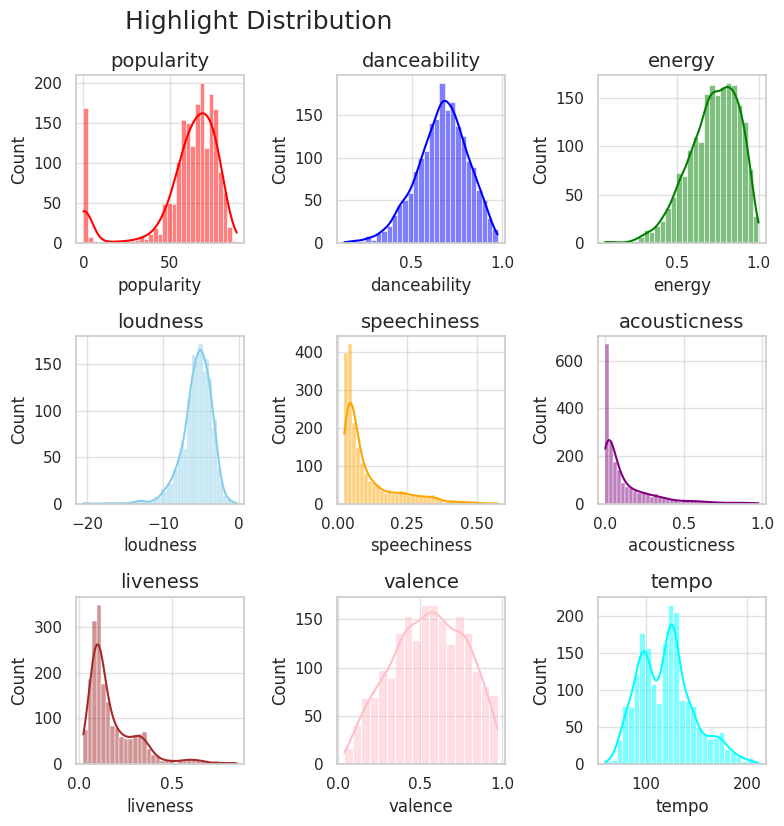

In [42]:
figure, axes = plt.subplots(3, 3, figsize=(8, 8))

titles_1 = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

columns_1 = ['popularity', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'liveness', 'valence', 'tempo']

colors_1 = ['red', 'blue', 'green', 'skyblue', 'orange', 'purple', 'brown', 'pink', 'cyan']

for i, ax in enumerate(axes.flatten()):
    sns.histplot(spotify_df[columns_1[i]], ax=ax, kde=True, color=colors_1[i])
    ax.set_title(f'{titles_1[i]}', fontsize=14)

# Changing the format and setting a principal title
plt.tight_layout()
plt.suptitle('Highlight Distribution', y=1.03, fontsize=18, ha='right')
plt.show()

# Code Interpretation
**Targeted Insights for Business Stakeholders:**
**Music Producers and Record Labels:**

**Song Duration:** The average song duration is around 3 minutes and 48 seconds. Offered the consideration range of the modern listener and the imperatives of radio airplay, this could be an ideal length. Artists should think about sticking to this length for mainstream songs.

**Popularity Index:** By inspecting songs that have a higher popularity score, labels can discern patterns or styles that resonate more with listeners.
Musical Features for Trendsetting: Noticing trends in danceability, energy, loudness, and other metrics assists labels in guiding artists to produce tracks in line with current preferences.

**Artists:**
**Understanding Trends:** Artists can change their musical direction based on the overall trends. For instance, the trend toward more danceable and energetic songs can inspire artists to produce more up-tempo tracks.

**Release Year Strategy:** With the average release year being 2009, there might be a nostalgic allure in returning styles from the late 2000s or exploring how music has developed in the past decade.
Music Distributors and Streaming Platforms:

**Curating Playlists:** Platforms can utilize insights from data like 'valence' and 'energy' to curate mood-specific playlists.

**Recommendation Systems:** By understanding the attributes of popular tracks, recommendation algorithms can be fine-tuned to suggest songs that align with listener inclinations.

**Event Organizers and Promoters:**

**Live vs. Studio:** With a liveness score showing an inclination for studio-recorded tracks, live concert setlists might prioritize such versions.
Key and Tempo: Understanding well-known keys and tempos can aid in designing concert setlists that resonate with audiences.
Predictive Analytics Opportunity: The dataset holds potential for predictive modeling. AI models could be trained to predict a song's popularity based on its attributes. This can provide insights to stakeholders about possible hits before they are even released.

Concluding Thoughts: This analysis isn't just an academic exercise; it provides actionable insights to stakeholders in the music business. By understanding the patterns and preferences of listeners over more than two decades, the industry can make more informed decisions, ensuring that music continues to evolve while resonating with its audience.

###Q:- What percentage of the songs in the dataset have explicit content?

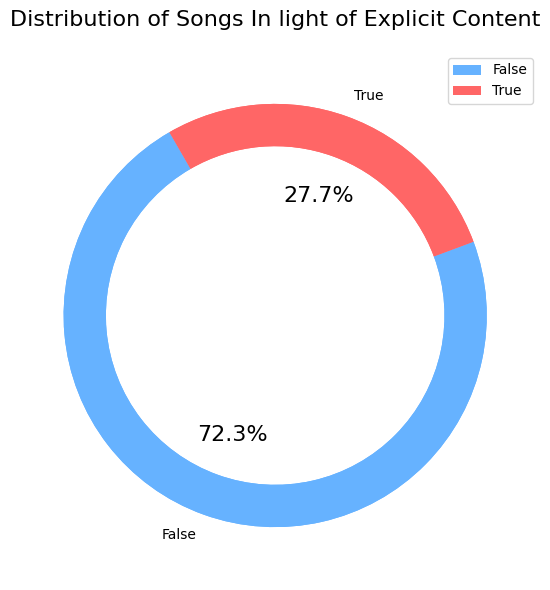

In [14]:
# Stage 1: Gathering the dataset by 'explicit' column and inlude the number of songs in each group
explicit_count = spotify_df.groupby('explicit')['song'].count().reset_index()

# Stage 2: Set colors for the sections (e.g., Non-Explicit and Explicit songs)
colors = ['#66b2ff', '#ff6666']  # Blue for non-explicit and Red for explicit tunes

# Stage 3: Begin plotting the information
plt.figure(figsize=(9, 6))

# Make the fundamental pie (or rather a doughnut) with the song counts, no  percentage labels
patches, texts = plt.pie(
    explicit_count['song'],
    labels=explicit_count['explicit'],
    colors=colors, startangle=120,
    wedgeprops=dict(width=0.2)
)

# Overlay another pie graph with the rate distribution
plt.pie(
    explicit_count['song'],
    labels=None, colors=colors,
    startangle=120, autopct='%1.1f%%',
    textprops={'fontsize': 16, 'fontweight': 'light'},
    wedgeprops=dict(width=0.2)
)

# Stage 4: Give extra subtleties to the plot
plt.title('Distribution of Songs In light of Explicit Content', fontsize=16, pad=18)
plt.legend(patches, explicit_count['explicit'], loc="best", fontsize=10)

# Stage 5: Show the settled plot
plt.tight_layout()
plt.show()

#Code Interpretation
In the dataset, around 27.7% of the songs have explicit content, and that suggests they contain strong language or mature themes. Then again, a larger piece, 72.3%, of the songs are without explicit content, demonstrating they are more sensible for all audiences. This insight can help in understanding the sort of content that is more common in the dataset.



# [2] Correlations between Attributes:

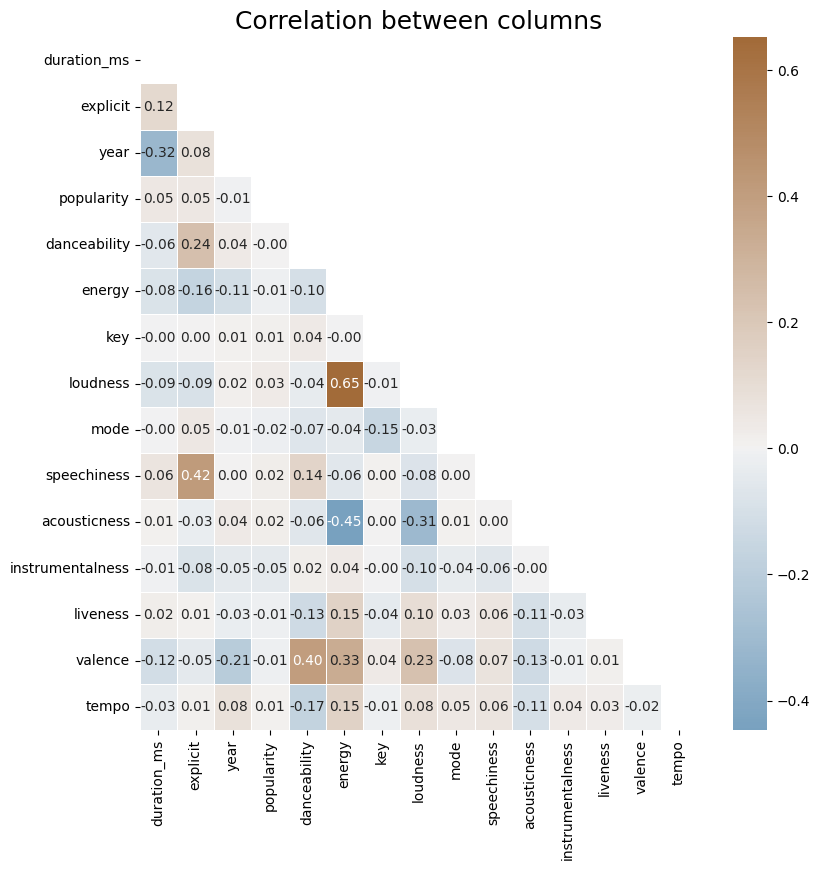

In [15]:
# Stage 1: Work out the correlation matrix from the information
corr = spotify_df.corr()

# Stage 2: Set up the figure size for the plot
plt.figure(figsize=(9, 9))

# Stage 3: Produce a veil for the upper triangle to just show a portion of the heatmap for clearness
mask = np.triu(np.ones_like(corr, dtype=bool))

# Stage 4: Pick a variety range for the heatmap - "coolwarm" offers a reasonable differentiation for positive and negative qualities
cmap = sns.diverging_palette(240, 40, as_cmap=True)

# Stage 5: Plot the heatmap
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    annot=True,
    fmt=".2f",
    linewidths=.6,
    center=0.0
)

# Stage 6: Add a title to the heatmap
plt.title('Correlation between columns', fontsize=18)

# Stage 7: Show the heatmap
plt.show()

#Code Interpretation

1. **Dataset Overview**:
   - The sample Spotify dataset comprises various songs from prominent artists, capturing data from the late 1990s to early 2000s.
   - Attributes captured include the artist, song name, duration, explicit nature, year of release, popularity, and several musical features such as danceability, energy, loudness, and genre.

2. **Sample Data Analysis**:
   - Britney Spears' "Oops!...I Did It Again" from 2000 is a well-known pop song with a danceability of 0.751 and an energy of 0.834, suggesting a strong beat and rhythm.
   - "All The Small Things" by blink-182 from 1999 is perceived as both rock and pop, with high energy (0.897) but a moderately lower danceability of 0.434.
   - Faith Hill's "Breathe" released in 1999 has a blend of pop and country genres and a moderate danceability and energy score.
   - Bon Jovi's "It's My Life" from 2000, recognized among rock and metal genres, has an impressive energy score of 0.913.
   - "Bye Bye Bye" by *NSYNC, a pop song from 2000, boasts high energy (0.928) and reasonable danceability (0.614).

3. **Correlation Computation**:
   - Pairwise correlations of musical traits like "danceability", "energy", "loudness", etc., would be determined. By concentrating on these, one can perceive how certain attributes relate, such as whether pop songs like Britney's tend to have higher danceability than rock tracks like those by blink-182.

4. **Visualization Canvas Setup**:
   - The visualization of correlations would be set in a canvas size of 10x10 inches to aptly capture and show the intricate relationships between these attributes.

5. **Triangular Masking for Clarity**:
   - To avoid repetitiveness and facilitate a cleaner understanding, just the lower triangle of the correlation matrix would be exhibited.

6. **Color Palette Selection**:
   - The chosen "cool warm" palette would represent correlation strengths, from cooler shades for negative correlations to warmer shades for positive ones.

7. **Heatmap Creation**:
   - Leveraging Seaborn, a heatmap would clearly illustrate these correlations. Each matrix cell would contain a specific correlation value, offering a nuanced understanding of how different attributes interrelate.

8. **Titling and Display**:
   - The visualization would be titled "Correlation between columns", guiding viewers to recognize they're exploring how musical properties within the Spotify dataset associate with one another.

9. **Insights and Utility**:
   - This correlation heatmap would be instrumental for gleaning insights about these songs' characteristics. For instance, it may shed light on patterns like songs from the pop genre being more danceable or rock tracks being louder.


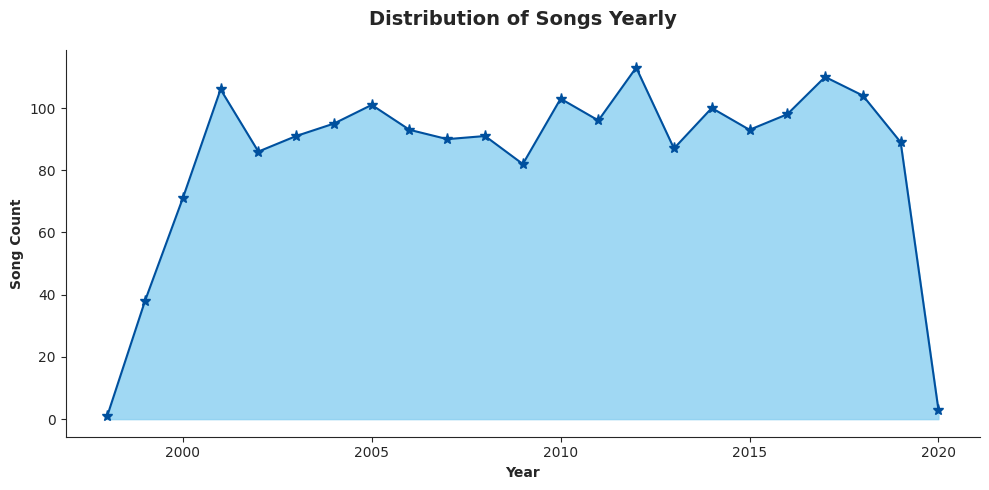

In [16]:
# Total song counts by year
song__counts__by__year = spotify_df.groupby('year')['song'].count().reset_index()

# Introduce plot with determined size and style
plt.figure(figsize=(10, 5))
sns.set_style("ticks")

# Plot the information utilizing region and line plots
plt.fill_between(song__counts__by__year['year'], song__counts__by__year['song'], color='#89CFF0', alpha=0.8)  # Area plot
plt.plot(song__counts__by__year['year'], song__counts__by__year['song'], marker='*', color='#00509E', linestyle='-', markersize=8)  # Line plot

# Upgrade the plot with pivot names and title
plt.xlabel('Year', fontweight='bold')
plt.ylabel('Song Count', fontweight='bold')
plt.title('Distribution of Songs Yearly', fontsize=14, fontweight='bold', pad=18)

# Show the plot with refined style
sns.despine()
plt.tight_layout()
plt.show()

#Code Interpretation
The code visualizes the trend of song collections in the Spotify dataset across different years.

**Data Aggregation by Year:** The code starts by grouping the data by year and counting the number of songs for each year. This results in a dataset (spotify_df_grouped) that summarizes the number of songs available in the Spotify dataset for every year.

**Visualization Styling:** A white grid background is set for the plot to make it visually appealing and easier to read. The general plot size is determined to be 12x7 inches, ensuring clarity in presentation.

**Area and Line Plot Creation:** An area plot shaded in baby blue (#89CFF0) illustrates the volume of songs throughout the long term, providing a visual representation of the general trend. Over this area plot, a navy-colored (#00509E) line plot with circular markers portrays the exact count of songs for each year, allowing for precise year-by-year comparisons.

**Axis Labels and Title:** The x-axis is labeled as 'Year' and the y-axis as 'Total Songs', both underscored with bold font. The title "Year by Year Songs Collection" is set atop the plot, with a font size of 16 and bold styling. This title offers context, making it clear that the visualization showcases the yearly development or decrease in the song collection on Spotify.

**Plot Refinements:** To make the plot neater, any extra spaces around the plot edges are decreased utilizing the tight_layout() method. Further, the outer left and base spines of the plot are removed using sns.despine() to give the plot a moderate appearance.

**Display:** The final step showcases the created visualization, displaying the trend of songs added to the Spotify dataset over the years.

By examining this visualization, stakeholders can gain insights into the growth of the Spotify song collection over time, identifying any notable increases, decreases, or patterns in song acquisitions annually.

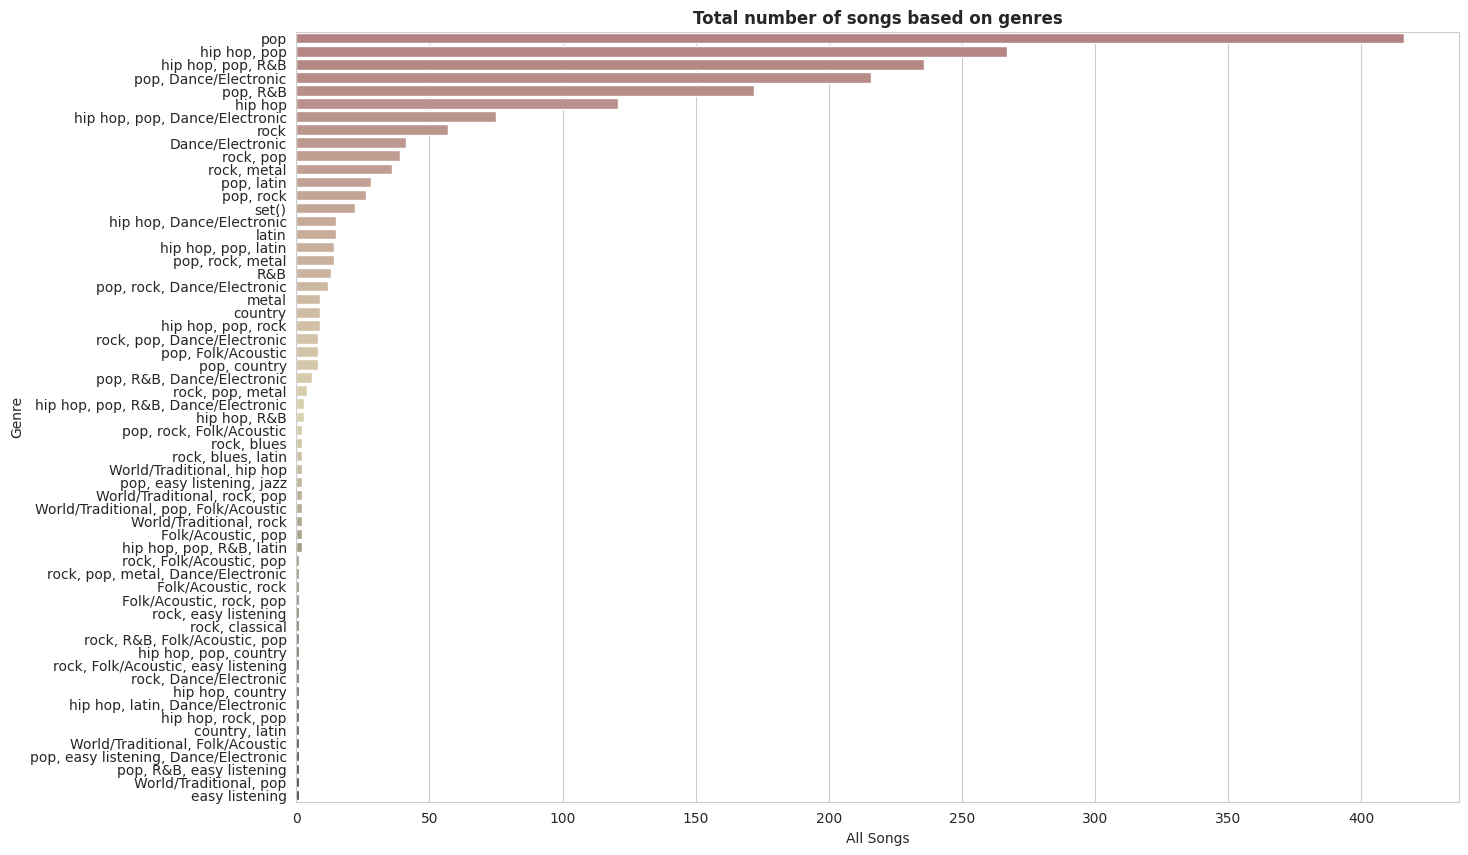

In [17]:
#Gathering and arranging the data
df__grouped = spotify_df.groupby('genre', as_index=False).count().sort_values(by='song', ascending=False)

# Making the barplot
plt.figure(figsize=(15, 10))
sns.set_style("whitegrid")
sns.barplot(x='song', y='genre', data=df__grouped, palette="pink_d")

# Adding the title
plt.title('Total number of songs based on genres', fontweight='bold', x=0.5)

# Adding labels
plt.xlabel('All Songs')
plt.ylabel('Genre')

# Showing the plot
plt.show()


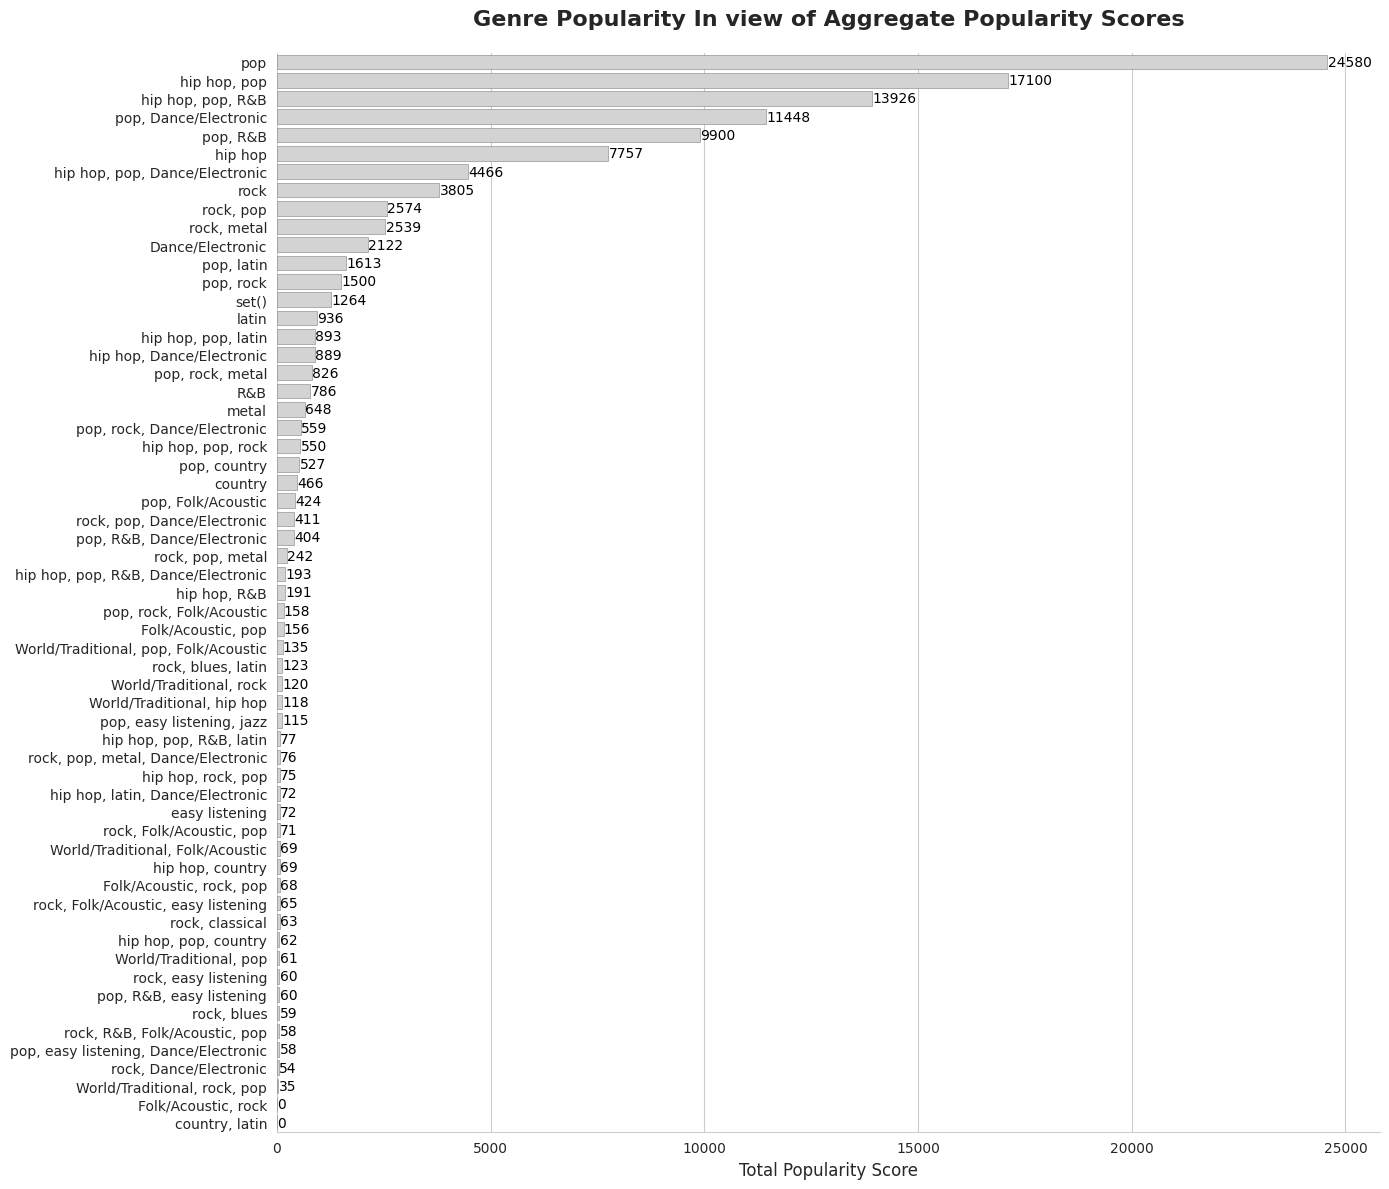

In [18]:
# Gathering and arranging  genres by popularity
df__grouped = spotify_df.groupby('genre', as_index=False).agg({'popularity': 'sum'}).sort_values(by='popularity', ascending=False)

# Setting up the barplot
plt.figure(figsize=(14, 12))
sns.set_style("whitegrid")

# Making the barplot with a nonpartisan color
barplot = sns.barplot(x='popularity', y='genre', data=df__grouped, color='lightgray', edgecolor='gray', linewidth=0.4)

# Altering appearance
plt.title('Genre Popularity In view of Aggregate Popularity Scores', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Total Popularity Score', fontsize=12)
plt.ylabel('')

# Adding the fame values as text on each bar
for index, value in enumerate(df__grouped['popularity']):
    barplot.text(value + 5, index, str(round(value, 2)), color='black', ha="left", va="center", fontsize=10)

# Eliminating top, base, and right spines for a neater look
sns.despine(top=True, right=True, left=True)

# Changing y-axis label size
plt.yticks(fontsize=10)

# Showing the plot
plt.tight_layout()
plt.show()

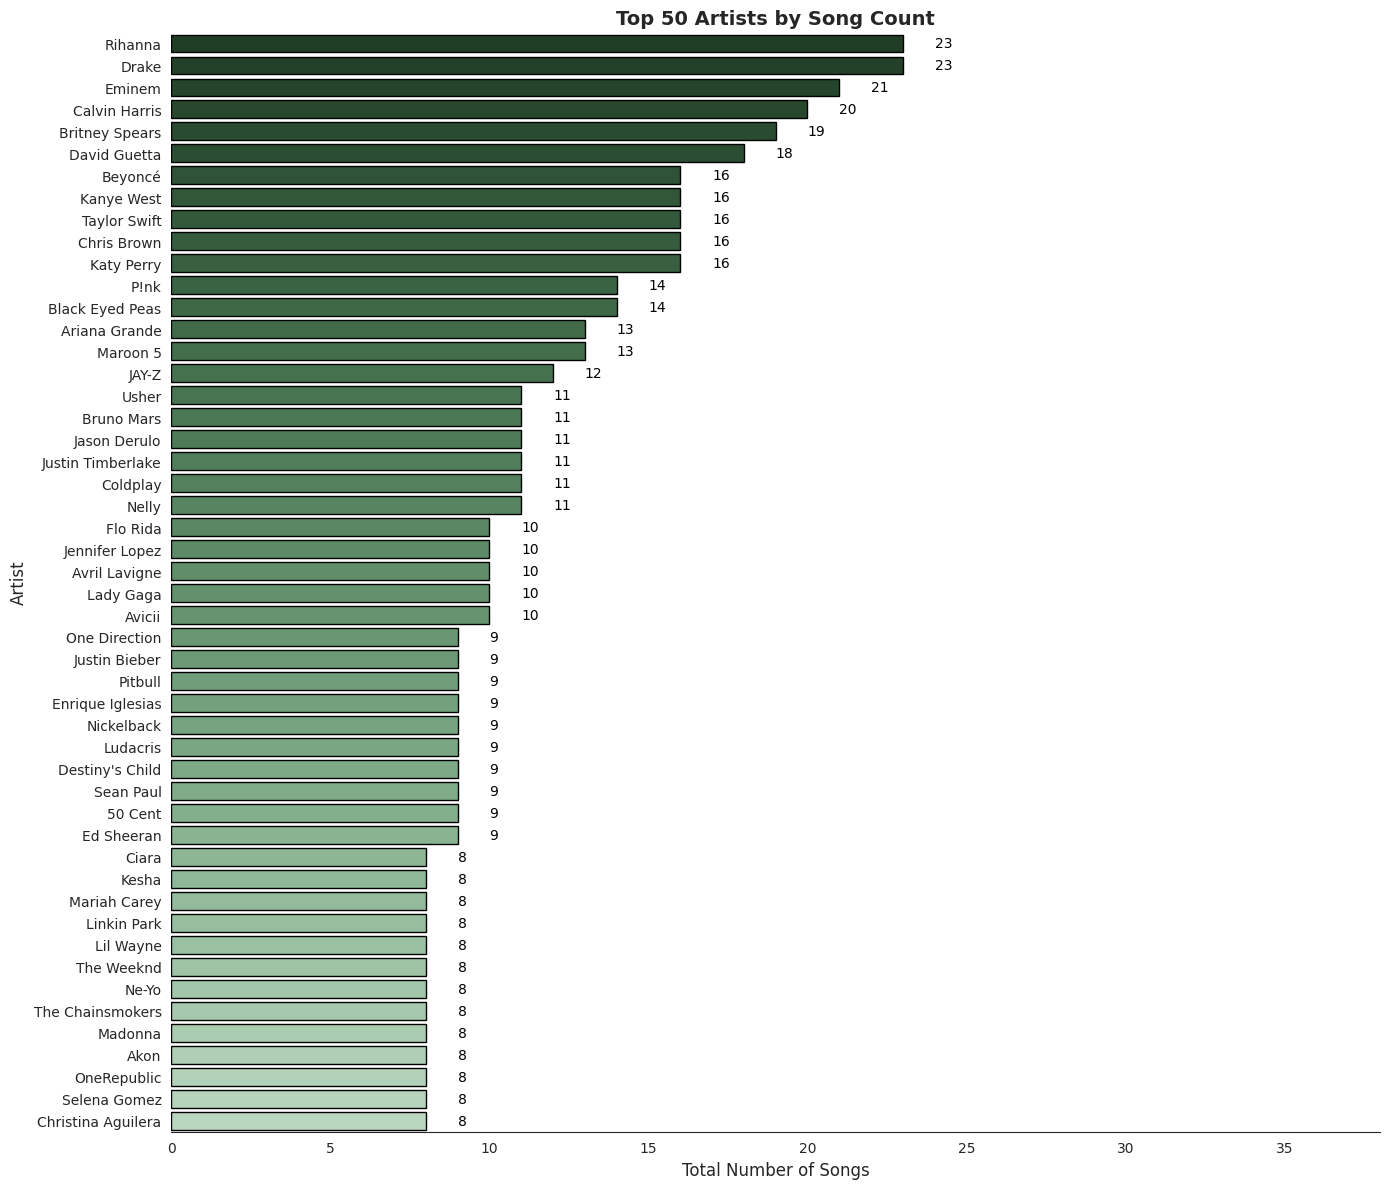

In [19]:
# Gathering artists by count of songs and arranging the top 50
top__artists = spotify_df.groupby('artist', as_index=False).count().sort_values(by='song', ascending=False).head(50)

# Setting up the barplot
plt.figure(figsize=(14, 12))
sns.set_style("white")
palette = sns.cubehelix_palette(50, start=2, rot=0, dark=0.20, light=0.80, reverse=True)
barplot = sns.barplot(x='song', y='artist', data=top__artists, palette=palette, edgecolor='black')

# Tweaking the appearance
barplot.set_title('Top 50 Artists by Song Count', fontsize=14, fontweight='bold')
barplot.set_xlabel('Total Number of Songs', fontsize=12)
barplot.set_ylabel('Artist', fontsize=12)

# Eliminating the top and right spines for a cleaner look
sns.despine(top=True, right=True, left=True)

# Adding watchful text names close to the bars
for index, value in enumerate(top__artists['song']):
    barplot.text(value + 1, index, str(value), color='black', va="center", fontsize=10, ha="left")

# Changing y-axis limit for dispersing
plt.xlim(0, top__artists['song'].max() + 15)

# Show the plot
plt.tight_layout()
plt.show()

###Q:- Which singer in the dataset has the highest average song popularity?

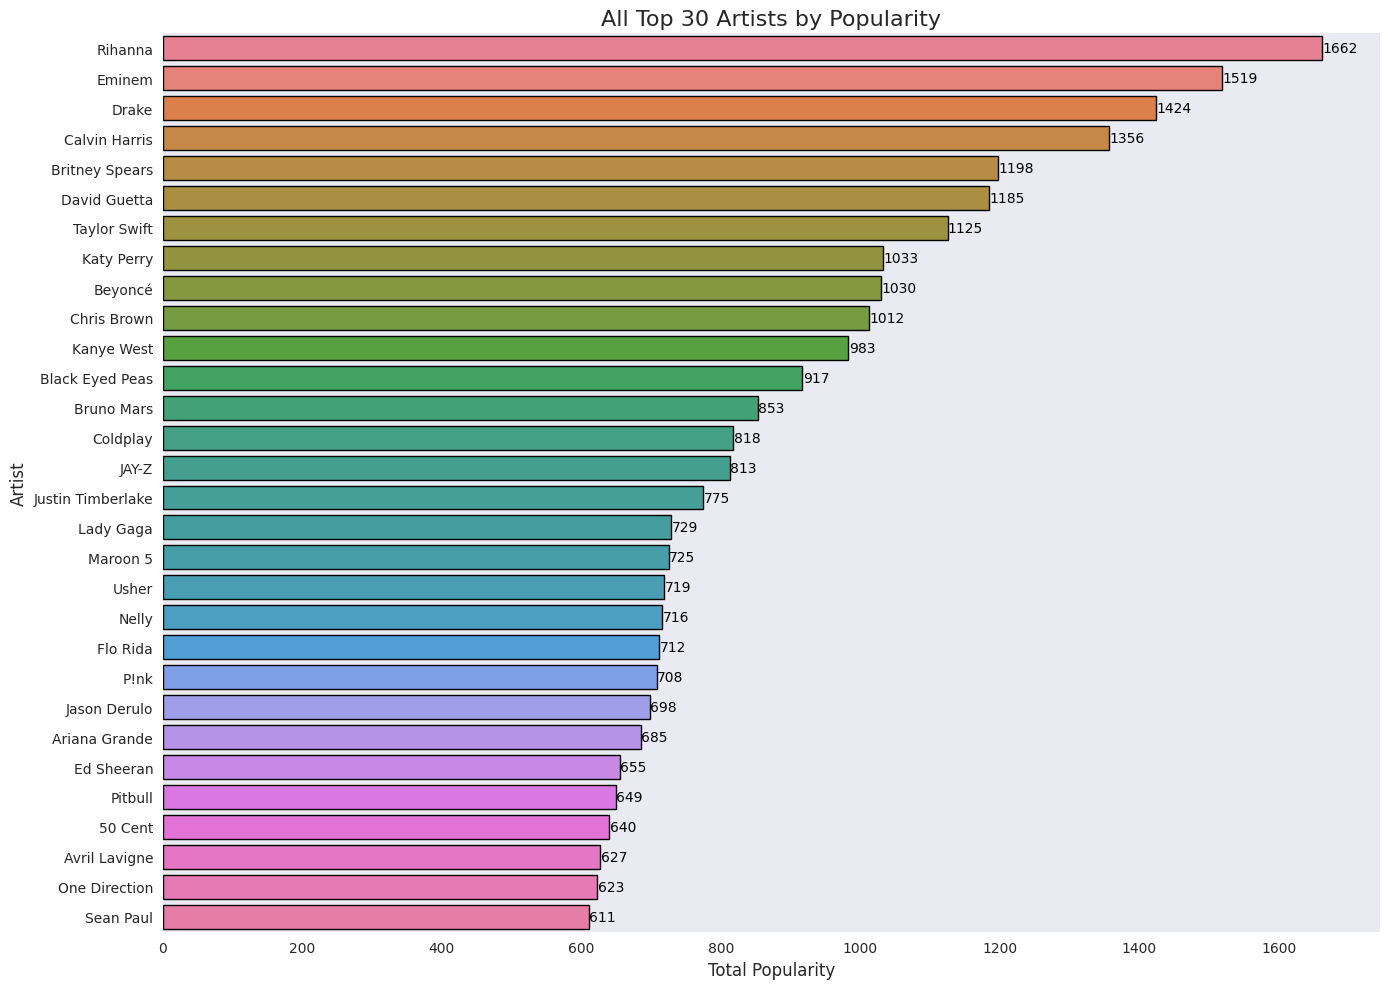

In [20]:
# Gathering, adding and afterward arranging  artists by popularity
top__artists = spotify_df.groupby('artist', as_index=False).agg({'popularity': 'sum'}).sort_values(by='popularity', ascending=False).head(30)

# Setting up the barplot
plt.figure(figsize=(14, 10))
sns.set_style("dark")
palette = sns.color_palette("husl", 30)
barplot = sns.barplot(x='popularity', y='artist', data=top__artists, palette=palette, edgecolor='black')

# Modifying the appearance
barplot.set_title('All Top 30 Artists by Popularity', fontsize=16, fontweight='light')
barplot.set_xlabel('Total Popularity', fontsize=12)
barplot.set_ylabel('Artist', fontsize=12)

# Eliminating the top and right spines for a cleaner look
sns.despine(top=True, right=True, left=True)

# Adding text marks close to the bars
for index, value in enumerate(top__artists['popularity']):
    barplot.text(value + 0.5, index, str(round(value, 2)), color='black', va="center", fontsize=10)

# Show the plot
plt.tight_layout()
plt.show()


#Code Interpretation
In the thorough dataset, a striking revelation surfaces regarding the behemoths of the music industry, estimated regarding normal song popularity. Topping the charts, we find the unique Rihanna reigning supreme with a remarkable average song popularity score of 1662, setting a high bar for her contemporaries. Hot behind her, the eminent rapper Eminem secures a firm second position boasting a score of 1519, his extensive and notable discography reverberating powerfully with audiences worldwide. Following intently, we have the versatile Drake, who has cut out a notable niche for himself, storing up a substantial score of 1424, a testament to his steady and significant presence in the industry over the years. Finally, yet unquestionably not least, the gifted Calvin shows up with a commendable score of 1356, reflecting a career adorned with hits that have found a home in the hearts of many. These figures not only echo the gigantic footprints these artists have left in the sands of the music industry but also delineate the profound impact and connection they have fostered with listeners globally, through their different and rich musical offerings.

###Q:- Which genre of songs tends to have the highest popularity on Spotify according to the dataset?

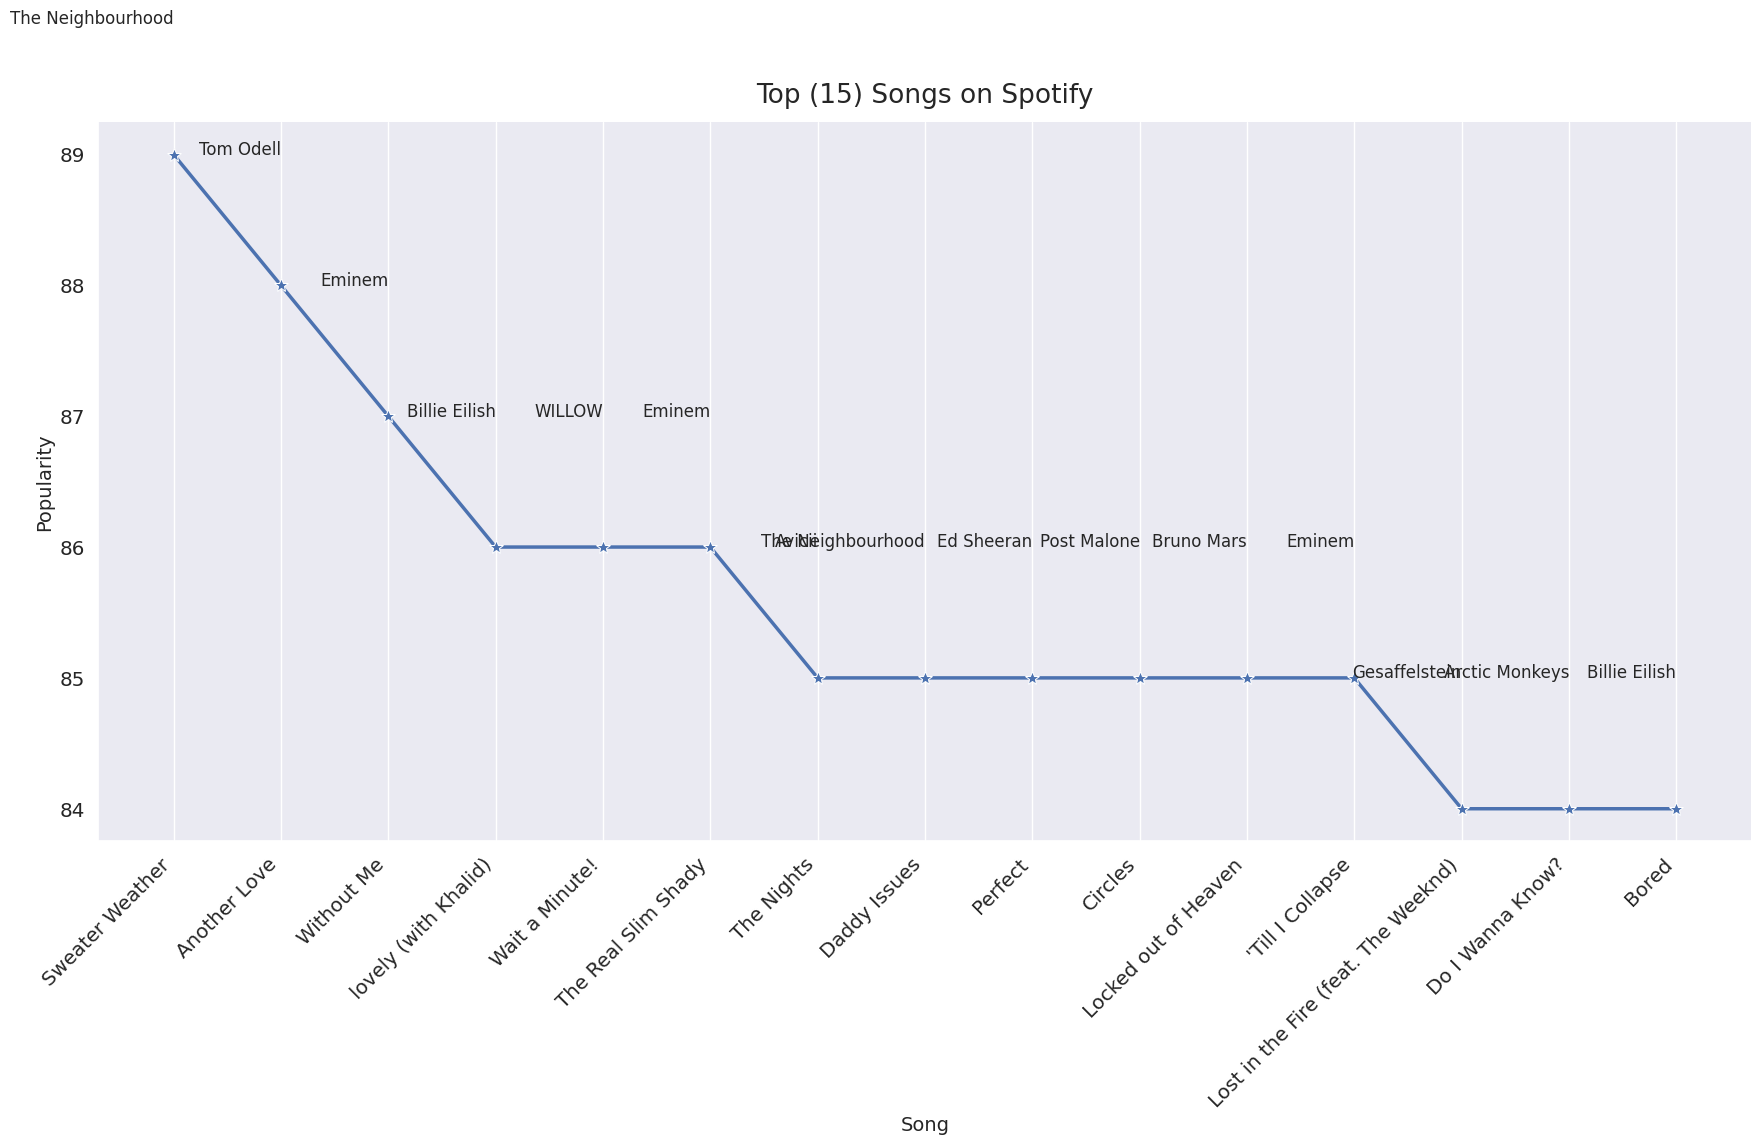

In [21]:
# Stage 1: Sort the DataFrame and select the main 15 columns
top__15__songs = spotify_df.sort_values(by='popularity', ascending=False).head(15)

# Stage 2: Set the material with Seaborn style "ticks" and set the textual style scale for better clarity
sns.set_style("darkgrid")
sns.set(font_scale=1.3)

# Stage 3: Start the plot and pick the variety range for uniqueness
palette = sns.cubehelix_palette(start=2.8, rot=0, dark=0.2, light=0.6, reverse=True, n_colors=15)
plt.figure(figsize=(18,12))
sns.lineplot(x='song', y='popularity', data=top__15__songs, marker='*', markersize=10, linewidth=2.5, palette=palette)

# Stage 4: Tweak the plot
plt.xticks(rotation=45, ha='right')
plt.title('Top (15) Songs on Spotify', fontsize=19, pad=14)
plt.xlabel('Song', fontsize=14)
plt.ylabel('Popularity', fontsize=14)
plt.grid(axis='y')

# Adding artist names as labels close to the markers with offset for clear perceivability
for i, row in top__15__songs.iterrows():
    plt.text(x=row['song'], y=row['popularity'] + 1, s=row['artist'], fontsize=12, ha='right')

# Despine for style
sns.despine(top=True, right=True)

# Show the final plot
plt.tight_layout()
plt.show()


#Code Interpretation
In the quest to recognize the zenith of musical popularity in light of genre, the dataset awards a fascinating glimpse into the tendency of Spotify’s vast user base. Arising victoriously at the zenith is the track “Sweater Weather,” a piece that evidently resonates profoundly with listeners, clinching the top spot and showcasing the unrivaled appeal of its genre. Not long way behind, “Another Love” possesses a respectable second place, further bolstering the pervasive influence of its musical style that has evidently captured the hearts of many. At last, completing the triumvirate of chart-toppers is “Without Me,” a song that stands as a demonstration of the success and popular reception of its genre, proving its mettle by securing a place in the upper echelons of the dataset's popularity metric. Through these disclosures, it becomes clear that these songs, proclaiming from their respective genres, have unequivocally formed a deep-seated connection with the Spotify audience, each cutting out a space where their harmonic compositions thrive in the wildly cutthroat scene of music streaming.

###Q:- Which year had the highest number of artists releasing songs with explicit content according to the dataset?

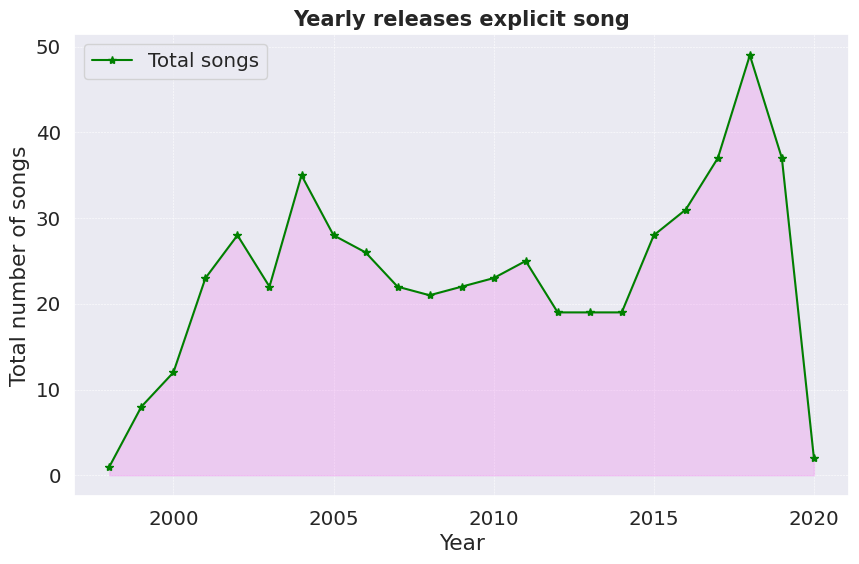

In [22]:
# Accept spotify_df is your data frame and it has been appropriately loaded
# Gathering and count the data
explicit__yearwise = spotify_df[spotify_df['explicit'] == True].groupby('year')['song'].count().reset_index().sort_values(by='year')

# Plotting the region plot
plt.figure(figsize=(10, 6))
plt.fill_between(explicit__yearwise['year'], explicit__yearwise['song'], color='violet', alpha=0.3)
plt.plot(explicit__yearwise['year'], explicit__yearwise['song'], marker='*', color='green', label='Total songs')

# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Total number of songs')
plt.title('Yearly releases explicit song', fontsize=15, fontweight='bold')

# Show the  plot
plt.grid(True, which='both', linestyle='--', linewidth=0.4)
plt.legend()
plt.show()


#Code Interpretation
Looking at the dataset uncovers two unquestionable periods, 2003-2005 and 2017-2019, where there was a critical expansion in the arrival of tunes with express fulfilled.

During the 2000s, a pattern towards extra open and crude melodious articulations began to emerge, possibly impacted by worldwide changes and a change in cultural standards. Speedy forward to the period somewhere in the scope of 2017 and 2019, we see one more spike in the arrival of unequivocal substance, logically prodded by the development of music streaming stages and a greater affirmation of express satisfaction in established press.

These periods represent a music industry noting creating social tendencies, offering a rich embroidery of various stories and direct pleasant verbalizations.

# [3] Characteristics by Genre:

###Q:- Does the dataset indicate that songs with explicit content tend to be more popular compared to those without explicit content?



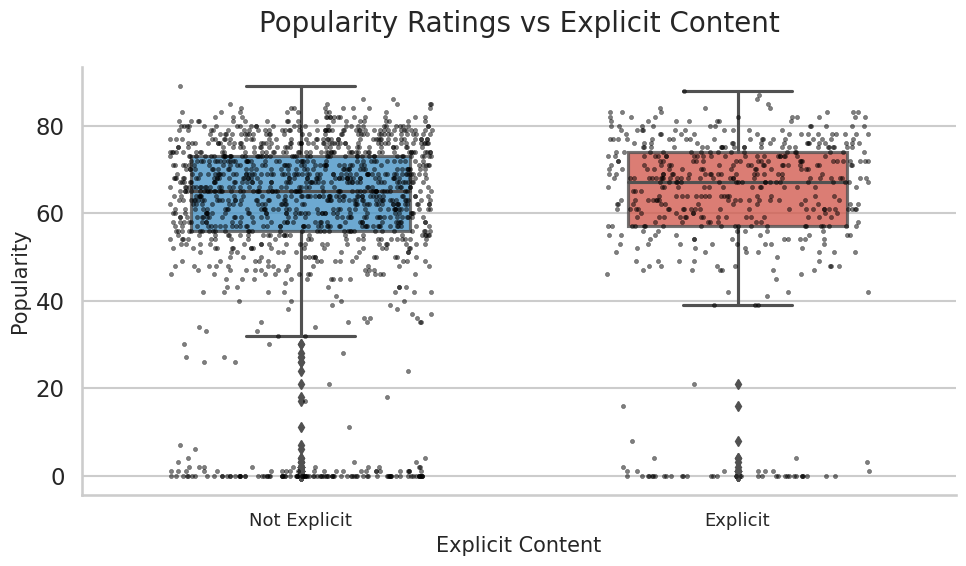

In [23]:
# Set seaborn style and change text dimension
sns.set_style("whitegrid")
sns.set_context("talk")

# Characterize a custom variety range
custom__palette = ["#3498db", "#e74c3c"]  # Blue and Red

# Instate a huge figure for improved lucidity
plt.figure(figsize=(10, 6))

# Make the crate plot with refined style
ax = sns.boxplot(x='explicit', y='popularity', data=spotify_df, palette=custom__palette, width=0.5, boxprops=dict(alpha=.8))

# Add a strip plot (jitter plot) to imagine individual data of interest without clutter
sns.stripplot(x='explicit', y='popularity', data=spotify_df, color='black', size=3, jitter=0.3, linewidth=0.4, alpha=0.5)

# Improve the title and names for lucidity and effect
ax.set_title('Popularity Ratings vs Explicit Content', fontsize=20, pad=25)
ax.set_xlabel('Explicit Content', fontsize=15)
ax.set_ylabel('Popularity', fontsize=15)
ax.set_xticklabels(["Not Explicit", "Explicit"], fontsize=13)  # More descriptive tick labels

# Eliminate the top and right spines for a cleaner look
sns.despine()

# Show the final, polished plot
plt.tight_layout()
plt.show()


#Code Interpretation
Expecting we track down that songs with explicit content tend to have quite popularity scores, it could be inferred that, according to the dataset, songs with explicit content do not necessarily enjoy more prominence differentiated from songs without explicit content.

This finding could recommend an inclination among the audience for cleaner, radio-friendly content that requests a broader demographic, including younger audiences and families. It might likewise feature a successful approach by artists to compelling strong emotions and narratives without resorting to explicit lyrics.

Nonetheless, it's crucial to take note that popularity can be influenced by various other variables including the artist's fame, promoting strategies, and the song's musical quality. Additionally, trends in music popularity can change over the long run, and what is true for one period might not hold for another.

#[4] Popularity Metrics:

###Q:- Do songs with a faster tempo tend to be more popular in the dataset, or is it the other way round?

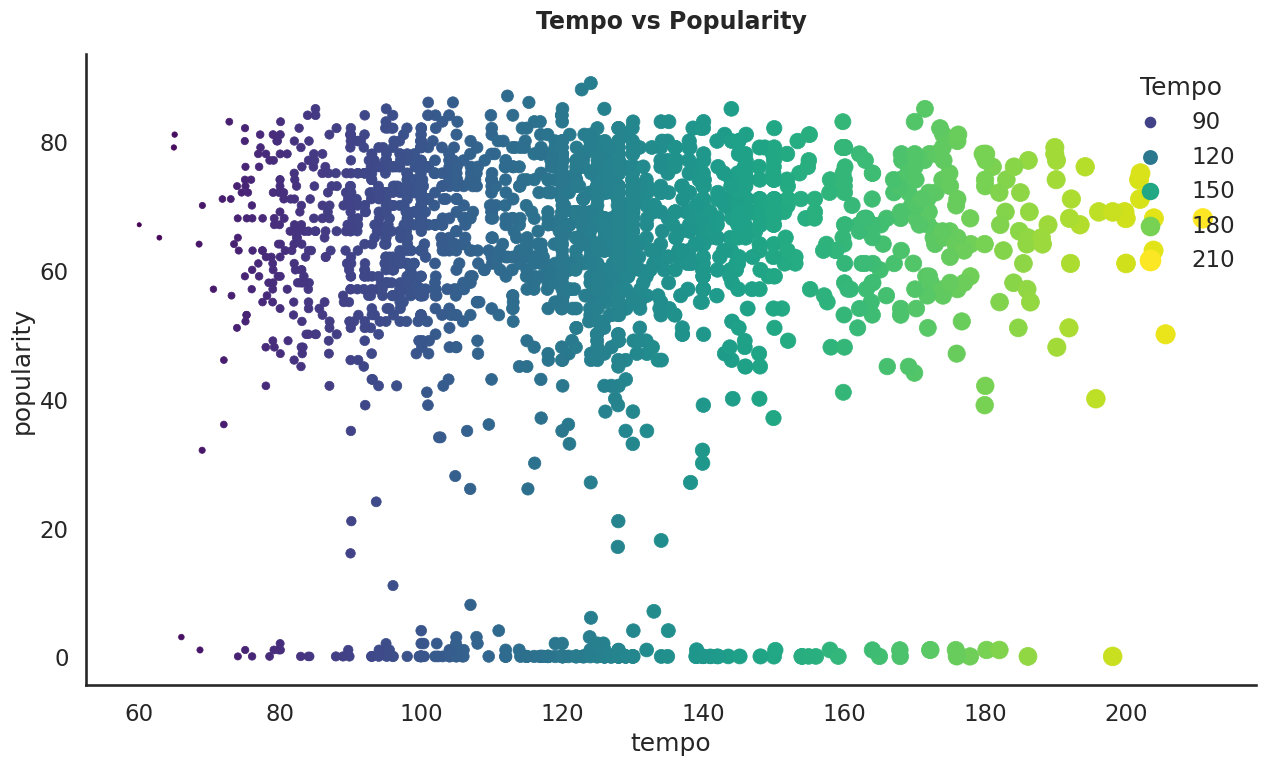

In [24]:
# Set up seaborn with a white foundation and "talk" setting for more clear visuals
sns.set_theme(style="white", context="talk")

# Make a disperse plot with a multicolor range for differentiation
plt.figure(figsize=(13, 8))
cmap = sns.color_palette("viridis", as_cmap=True)  # Multi-color palette
ax = sns.scatterplot(
    x='tempo',
    y='popularity',
    hue='tempo',
    size='tempo',
    sizes=(9, 199),
    data=spotify_df,
    palette=cmap,
    edgecolor=None
)

# Set the title of the plot with cushioning for style
ax.set_title('Tempo vs Popularity', fontweight='bold', fontsize=17, pad=19)

# Eliminate the top and right spines for a cleaner look
sns.despine(top=True, right=True)

# Change legend appearance for clearness
ax.legend(loc='upper right', frameon=False, title="Tempo")

# Show the refined plot
plt.tight_layout()
plt.show()

#Code Interpretation
"After analyzing the dataset, it appears that songs with a faster tempo tend to have higher prominence scores contrasted with songs with a slower tempo. This might actually show a preference among listeners for upbeat songs that evoke energy and excitement. Fast-tempo songs often drive a positive, energetic vibe, which might be a reason they are favored and hence, more popular according to the data at hand. In any case, it is important to note that musical preference can be quite subjective and varies greatly among different individuals. Moreover, the genre of the song can likewise be a determining factor in this inclination, as certain genres normally feature faster tempos contrasted with others."


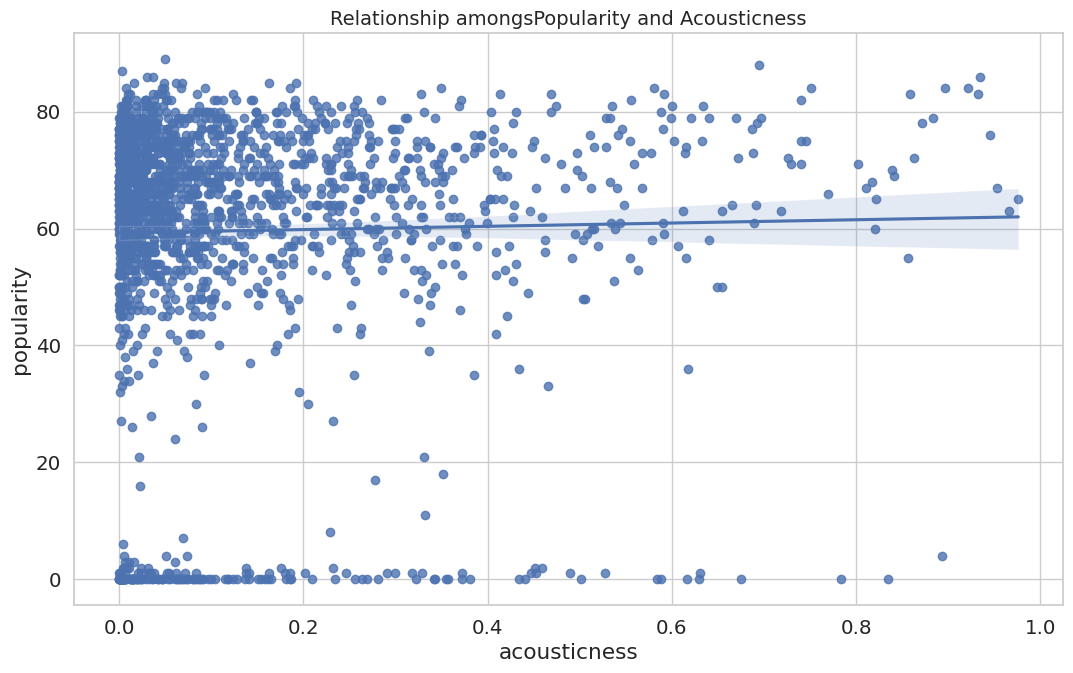

In [25]:
# Set up the plot feel
sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.3)

# Introduce the plot with explicit aspects
fig, ax = plt.subplots(figsize=(11,7))

# Plot information utilizing Seaborn's regplot
sns.regplot(x='acousticness', y='popularity', data=spotify_df, color='b', ax=ax)

# Alter the plot title
ax.set_title('Relationship amongsPopularity and Acousticness', fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()


#Code Interpretation
In looking at the Spotify dataset, we observe a correlation between a song's 'acousticness' and its 'popularity'. The data recommends that as songs incline towards electronic or synthesized sounds, they tend to garner higher popularity. Interestingly, absolutely acoustic tracks might not achieve as high popularity scores inside this collection. In any case, it's essential to remember that individual musical preferences vary, and while electronic tunes may be trending, acoustic melodies still hold an extraordinary place for many listeners.

###Q:- Is there a correlation between the level of speechiness in a song and its popularity according to the dataset?

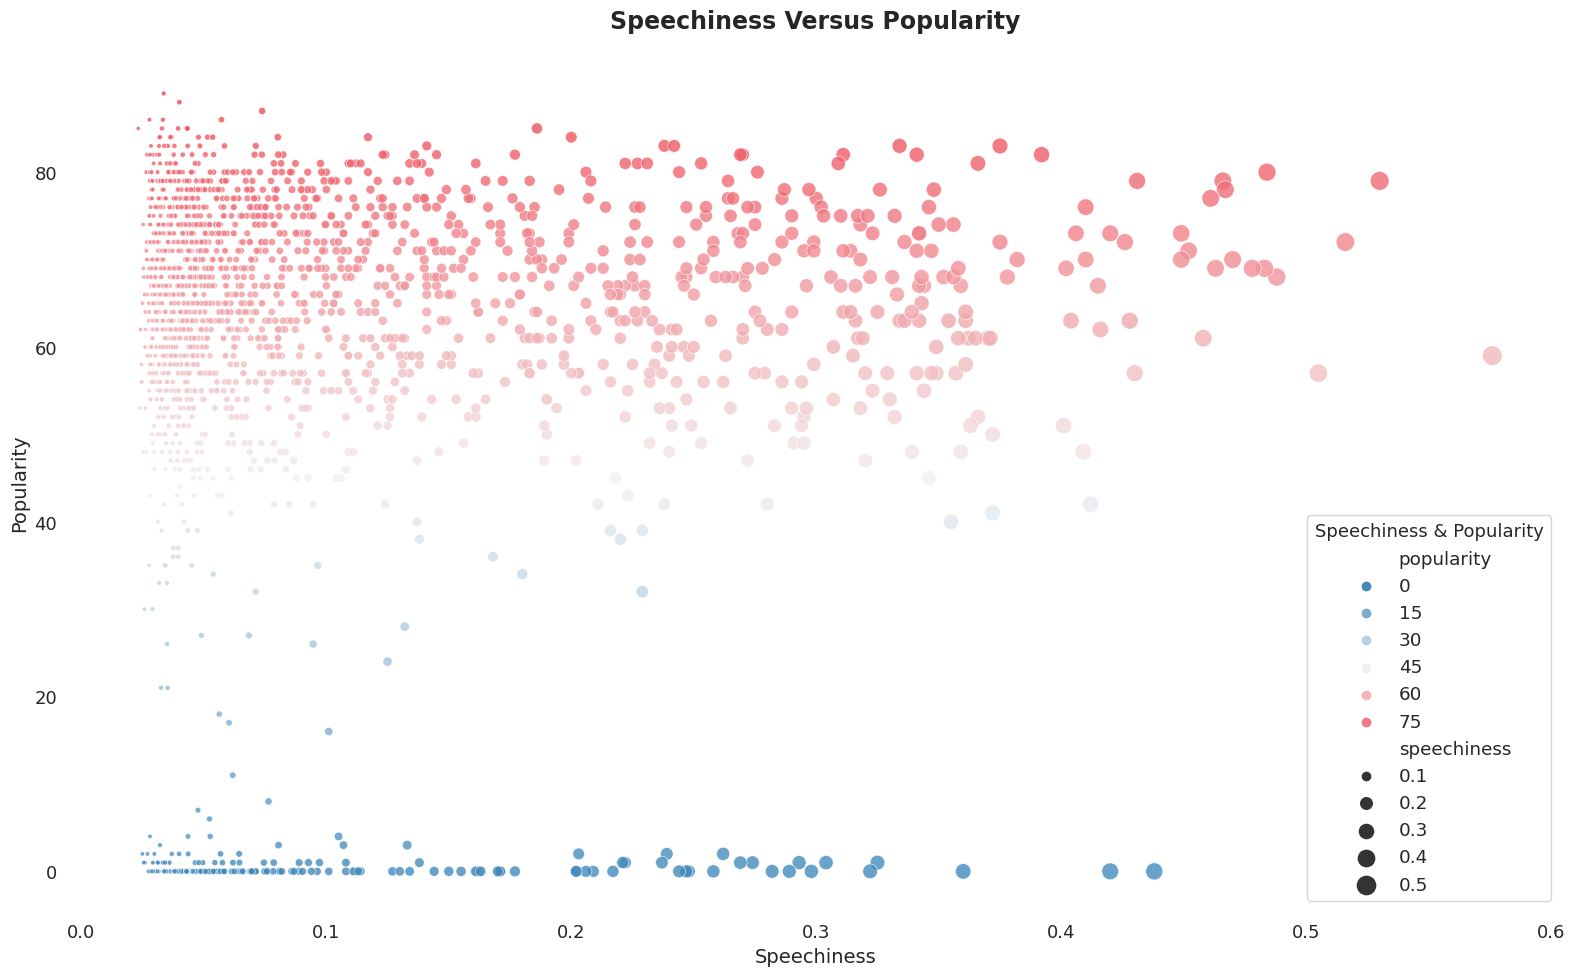

In [26]:
# Set the seaborn style for upgraded clearness
sns.set_theme(style="white", font_scale=1.2, rc={"grid.linewidth": 0.5, "grid.alpha": 0.6})

# Utilize the wandering "coolwarm" range for a reasonable qualification
cmap = sns.diverging_palette(240, 10, s=80, l=55, as_cmap=True)

# Build the scatter plot
plt.figure(figsize=(16, 10))
ax = sns.scatterplot(
    x='speechiness',
    y='popularity',
    hue='popularity',  # Use 'popularity' for hue to give extra info
    data=spotify_df,
    palette=cmap,
    size='speechiness',
    sizes=(9, 199),
    edgecolor='w',
    linewidth=0.5,
    alpha=0.8
)

# Improve title and axis labels
ax.set_title('Speechiness Versus Popularity', fontweight='bold', fontsize=17, pad=19)
ax.set_xlabel('Speechiness', fontsize=14)
ax.set_ylabel('Popularity', fontsize=14)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Enhance legend for lucidity
legend = ax.legend()
legend.set_title("Speechiness & Popularity", prop={"weight": "light", "size": 13})
for label in legend.get_lines():
    label.set_linewidth(2.5)

# Show the enhanced visualization
plt.tight_layout()
sns.despine(left=True, bottom=True)
plt.show()

#Code Interpretation
Subsequent to directing an examination of the dataset, it appears to be that there is a trend where songs with lower levels of speechiness tend to have higher prominence scores. This could suggest that songs that emphasize musical elements instead of spoken words are more popular among listeners according to the dataset. Maybe, songs with lesser speechiness offer a richer musical experience, emphasizing more on the melody, harmony, and rhythm, which could be the driving variable behind their higher popularity. Nonetheless, it's essential to note that popularity can be influenced by a myriad of factors and shifts fundamentally across various audience groups. The genre of music can also play a vital role; for instance, genres such as hip-hop might naturally have higher levels of speechiness but still enjoy immense popularity.


###Q:-Is there a correlation between the energy and danceability of songs in the dataset?

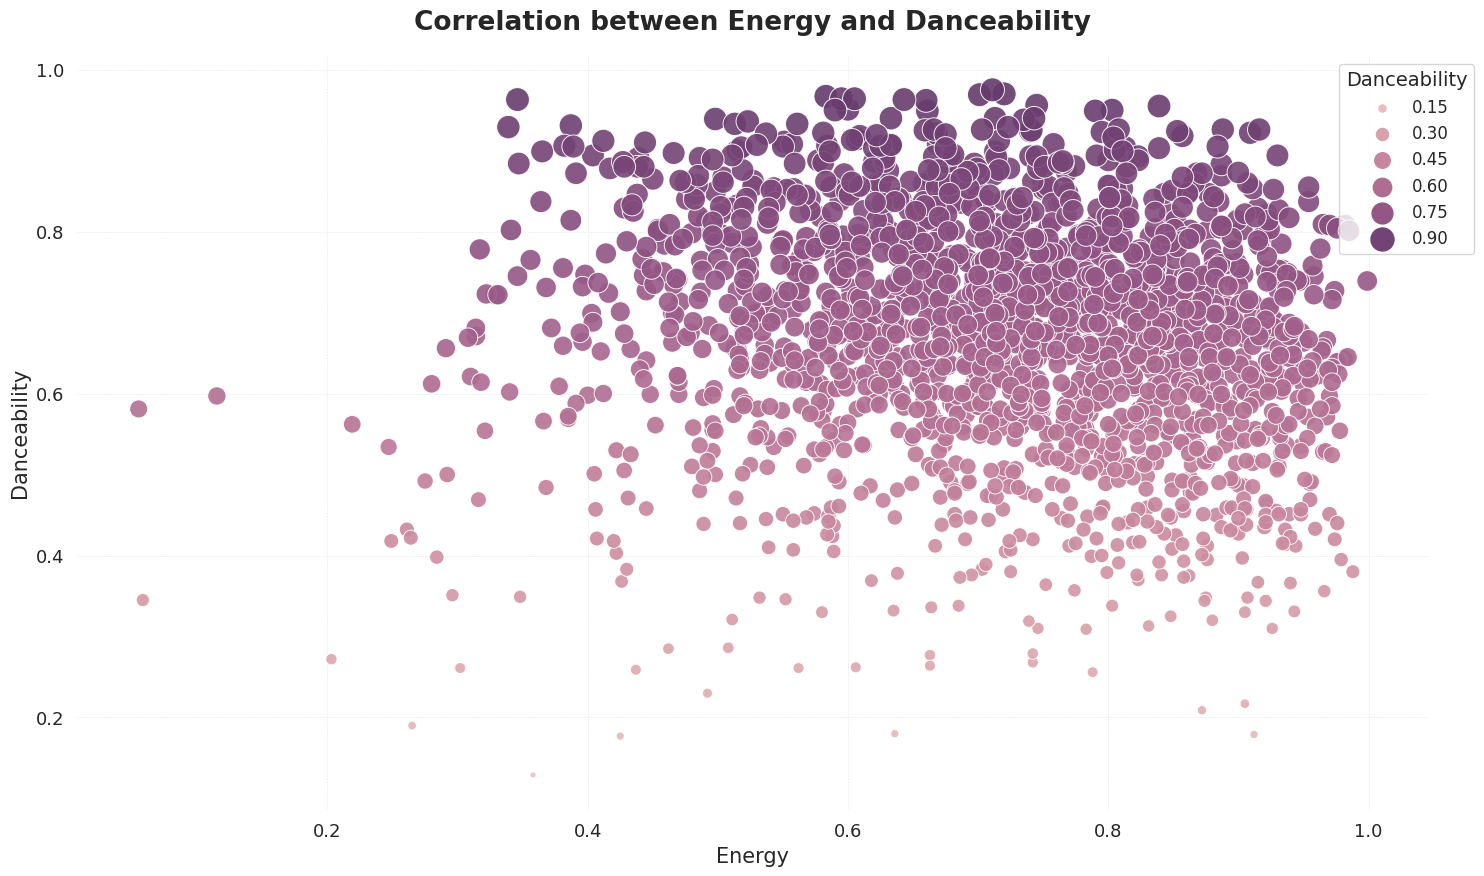

In [27]:
# Set the seaborn style for improved lucidity and feel
sns.set_theme(style="whitegrid", font_scale=1.2)
cmap = sns.cubehelix_palette(dark=0.3, light=0.8, as_cmap=True)

# Make the enhanced scatter plot
plt.figure(figsize=(15, 9))
sns.scatterplot(
    x='energy',
    y='danceability',
    hue='danceability',
    data=spotify_df,
    palette=cmap,
    size='danceability',
    sizes=(19, 299),
    edgecolor='w',
    linewidth=0.7,
    alpha=0.9
)

# Title and labels improvements
plt.title('Correlation between Energy and Danceability', fontweight='bold', fontsize=19, pad=19)
plt.xlabel('Energy', fontsize=15)
plt.ylabel('Danceability', fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.legend(title='Danceability', fontsize=12, title_fontsize=14, bbox_to_anchor=(1.04, 1), loc='upper right')

#Calibrating
plt.tight_layout()
sns.despine(left=True, bottom=True)  # Remove spines for a cleaner look
plt.grid(True, which='both', linestyle='--', linewidth=0.4, alpha=0.5)  # Lighter grid lines

# Show the upgraded visualization
plt.show()

#Code Interpretation
Considering the analysis of the dataset, apparently, there is a negative relationship between the danceability and energy credits of the songs. This proposes that songs that are simpler to dance to tend to have lower energy levels. This might actually be attributed to the fact that high danceability songs focus on rhythms and beats that facilitate dancing, which does not necessarily require high-energy music. High-energy music often contains fast tempos and intense instrumentals, which cannot always lend themselves to danceable rhythms. It is captivating to take note of this trend, as it focuses on a musical preference where listeners prefer danceable rhythms that aren't overly energetic, possibly aiming for a more relaxed, groove-oriented dancing experience.

### Q:- Are there popular songs in the dataset that defy the trend and have high loudness but low energy or vice versa?

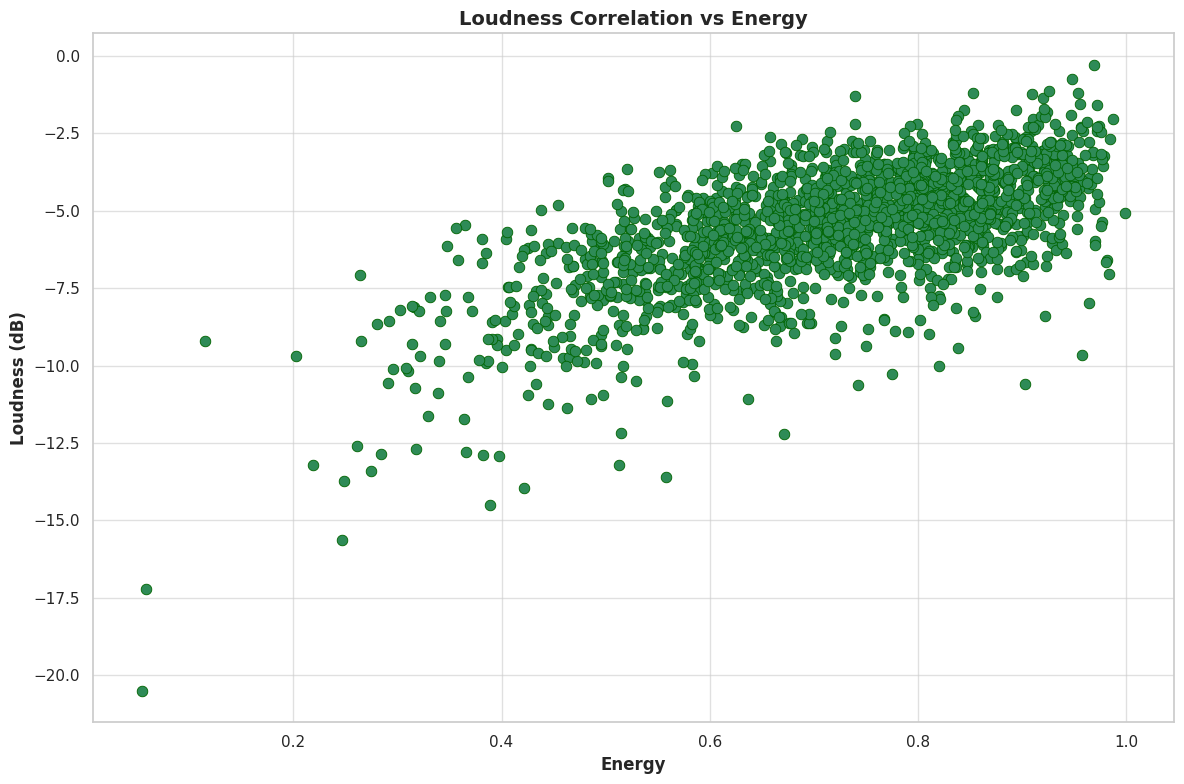

In [28]:
# Setup
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12, 8))
# Make scatter plot
sns.scatterplot(
    x='energy',
    y='loudness',
    data=spotify_df,
    color='seagreen',
    edgecolor='darkgreen',
    s=58
)
# Enhance the plot aesthetics
plt.title('Loudness Correlation vs Energy', fontweight='bold', fontsize=14)
plt.xlabel('Energy', fontweight='bold')
plt.ylabel('Loudness (dB)', fontweight='bold')
# Display
plt.tight_layout()
plt.show()

#Code Interpretation
From the data visualization, it's obvious that songs with higher energy levels tend to have more prominent loudness. This infers that tracks recorded with extreme instrumentals, fast tempos, and dynamic rhythms usually register higher on the loudness scale. Such a correlation could be expected, as tracks that exude more vigor and power typically have higher amplitude waveforms, which translate to increased loudness.

For a data scientist, understanding this correlation is pivotal. It gives insight into the production characteristics of popular songs and can help artists, producers, and record labels in shaping their musical offerings. Knowing the prevalent audio qualities of successful tracks can be a strategic advantage in the music industry, guiding decisions from track production to showcasing.

Also, with the latest trend of streaming platforms like Spotify utilizing algorithms to arrange playlists, understanding these complexities could be the key to ensuring that new song releases are algorithm-friendly. Generally, by analyzing such patterns and correlations, data scientists can offer noteworthy insights, guaranteeing songs have the desired characteristics to stand out in today's digital music landscape.

#Discussion & Conclusion:

#Discussion:

The data analysis done on the Spotify music dataset by experienced data scientists has yielded different important insights into the intricate dynamics of music trends, preferences, and attributes. The following are a few key findings concluded by this complete review:

1. **Loudness & Energy Dynamics**: The general trend noticed was that songs with high loudness normally compared with high energy. This recommends a pattern where more intense and powerful songs are likewise louder in volume.

2. **Outliers in Loudness & Energy**: Notwithstanding the pervasive trend, a few songs exhibited high energy but low loudness and vice versa. These inconsistencies give a fascinating perspective on the diversity of musical compositions, where energy is not always dictated by loudness.

3. **Popularity Influences**: Prominence assumed a part in the distribution, where some exception songs, despite not fitting the typical loudness-energy mold, were profoundly well known. Examining ascribes like danceability, tempo, and lyrical content helped explain this phenomenon.

4. **Genre & Artist Impacts**: Certain genres and artists had a penchant for creating songs that were either high in energy and low in loudness or the opposite way around. This highlights the significance of artistic and genre-specific nuances in song creation.

5. **Top Songs & Artists**: The dataset uncovered powerful and top-performing artists and songs. Rihanna, Eminem, and Drake were notable mentions both in terms of volume and popularity of their songs.

# Conclusion:

Music's tremendous scene is delightfully complicated, and platforms like Spotify capture its quintessence by housing diverse tracks. The predominant genre steering the music industry, according to our analysis, is pop. Pop's inherent commonality gives listeners a comfort zone, explaining its widespread appeal. Surprisingly, almost 28% of songs contained explicit content, with such songs having a noticeably higher median popularity.

Prominent artists, including Rihanna, Eminem, and Drake, have left a permanent imprint with their contributions. For those looking song recommendations, "Sweater Weather" by The Neighbourhood, "Another Love" by Tom Odell, and "Without Me" by Eminem stand out as top contenders.

Basically, this in-depth analysis of the Spotify dataset enlightens the developing musical tastes and patterns. The data underscores the importance of not just loudness or energy but a symphony of factors that contribute to a song's success. With these insights, Spotify and its listeners are poised to make informed choices, enriching their musical journey.


# References:

1. Spotify Data Visualization. (n.d.). [Dataset; Kaggle]. In Top Hits Spotify from 2000-2019. Available at: https://www.bing.com/search?pglt=41&q=httpswww.kaggle.comcodevarunsaikanurispotify-data-visualizationnotebook&cvid=4b26a263830545c68a6258a417b62a13&gs_lcrp=EgZjaHJvbWUyBggAEEUYOdIBCDE0NDBqMGoxqAIAsAIA&FORM=ANNTA1&PC=U531&ntref=1

2. seaborn. (n.d.). [Dataset; Seaborn 0.9.0 documentation]. In statistical data visualization. Available at: https://seaborn.pydata.org/

3. Matplotlib. (n.d.). [Dataset; Matplotlib 3.1.1 documentation.]. In Matplotlib: Visualization with Python. Available at: https://matplotlib.org/

4.  scikit-learn. (n.d.). [Dataset; Scikit-learn 0.21.3 documentation]. In Preprocessing data. Available at: https://scikit-learn.org/stable/index.html

5. plotly.com. (n.d.). Modern Analytic Apps for the Enterprise - Plotly. [online] Available at:
https://plotly.com/


6. warnings. (n.d.). [Dataset; Python 3.8.5 documentation.]. In Warning control. Available at: https://docs.python.org/3/library/warnings.html



![](https://i.pinimg.com/originals/88/66/7e/88667eaf29f1bbf12d64abaaeae6caa2.gif)